# Spaceship Titanic

## Which passengers were transported to another dimension?

In this lab, we will predict which passengers were transported to another dimension during the Spaceship Titanic's collision with the spacetime anomaly. 

#### Dataset description

- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Outline
...


## 1. Packages

First, let's run the cell below to import all the packages that we will need during this assignment.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Viewing The Data

Taking a look in our training dataset and getting more familiar with it. Remember that the training dataset and test dataset are already separated.

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Looking at the first five examples of the dataset.

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Seeing the shape of our dataset.

In [5]:
n_rows = df_train.shape[0]
n_columns = df_train.shape[1]

print(f"The number of rows is: {n_rows}")
print(f"The number of columns is: {n_columns}")

The number of rows is: 8693
The number of columns is: 14


In [6]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Checking if the dataframe has some null value.

In [7]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Notice that we have some columns with null values, then, posteriorly, we have we will have to treat these columns.

#### Summary of each categorical feature

In [8]:
df_train.describe(include=object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


#### Summary measures of each numerical feature

In [9]:
df_train.describe(include=[int, float])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## 3. Exploratory Analysis

### 3.1. Viewing our `target`

Our target is the column `Transported`, which tell us if a passenger were transported to another dimension or not. We can see that with the values of this column, that are:

- `False`: The passenger were not transported.
- `True`: The passenger were transported.

Let's take a look in the proportion of the values.

In [12]:
df_train['Transported'].value_counts(normalize=True).round(3)

True     0.504
False    0.496
Name: Transported, dtype: float64

That is great, this showns that the proportion between the two possibilities it's practically the same. This mean that the dataset is balanced, which avoids **overffiting**, is able to **not overestimate performance and generalize more**.

### 3.2.  Bar relations

Let's try verify some relations that the others columns have with our target.

**Categorical columns with few values**

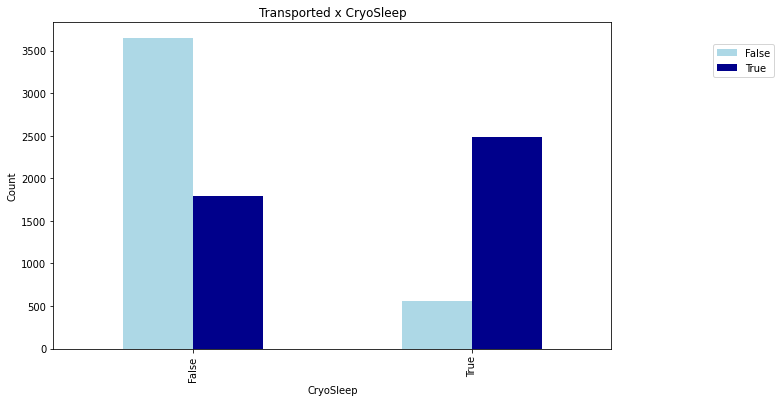

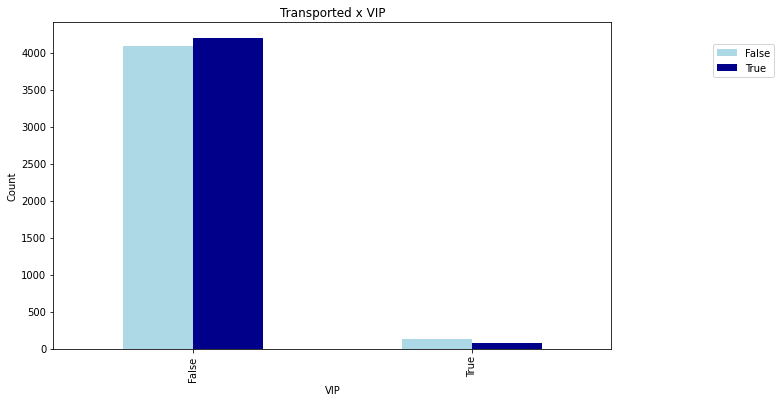

In [34]:
# ploting bar of CryoSleep and VIP (only two values)
colors1 = ['lightblue','darkblue']

relation = pd.crosstab(df_train['CryoSleep'], df_train['Transported'])
relation.plot.bar(color = colors1, figsize=(10,6))
plt.ylabel('Count')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.3, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Transported x CryoSleep')
plt.show()

relation = pd.crosstab(df_train['VIP'], df_train['Transported'])
relation.plot.bar(color = colors1, figsize=(10,6))
plt.ylabel('Count')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.3, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Transported x VIP')
plt.show()

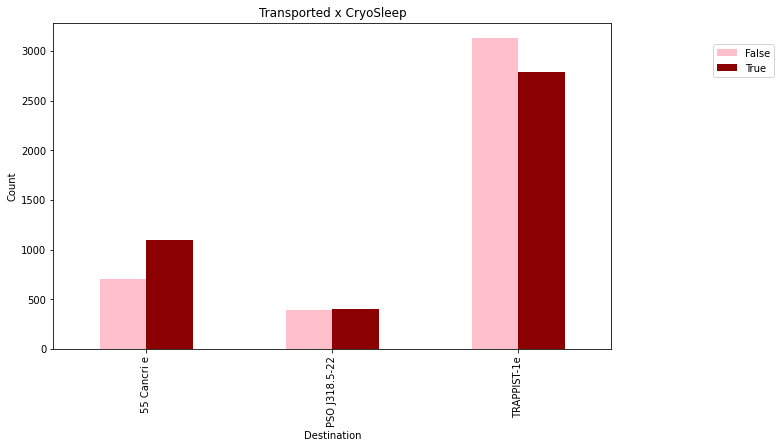

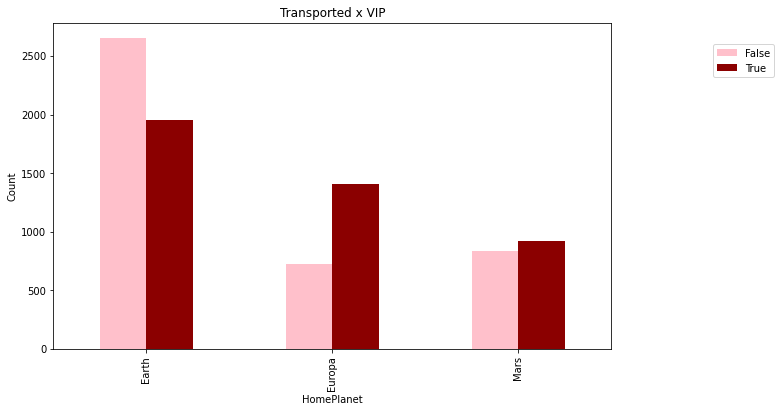

In [35]:
# ploting bar of CryoSleep and VIP (only three values)
colors2 = ['pink','darkred']

relation = pd.crosstab(df_train['Destination'], df_train['Transported'])
relation.plot.bar(color = colors2, figsize=(10,6))
plt.ylabel('Count')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.3, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Transported x CryoSleep')
plt.show()

relation = pd.crosstab(df_train['HomePlanet'], df_train['Transported'])
relation.plot.bar(color = colors2, figsize=(10,6))
plt.ylabel('Count')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.3, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Transported x VIP')
plt.show()

**Numerical columns without `Age`**

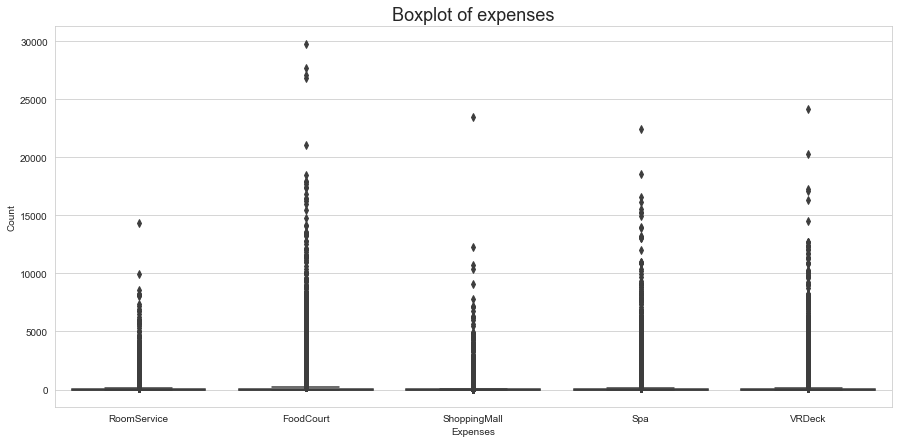

In [44]:
# taking numerical columns without age 
num_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numerical = df_train.loc[:, num_columns]

# figure size
plt.figure(figsize=(15, 7))

# Create simultaneous boxplot with Seaborn
sns.boxplot(data=numerical)
plt.xlabel('Expenses')
plt.ylabel('Count')
plt.title('Boxplot of expenses',loc="center", fontsize=18)

# Show the figure
plt.show()